In [29]:
import pandas as pd

In [43]:
df = pd.read_csv('C:/Users/misherman/Desktop/indicator_estimated prevalence all tb per 100000 - Data.csv', 
                thousands = ',')
df = df.set_index('TB prevalence, all forms (per 100 000 population per year)')
df.index.names = ['country']
df.columns.names = ['year']

In [42]:
df.head(5)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [52]:
df.shape

(207, 18)

In [20]:
df.dtypes

TB prevalence, all forms (per 100 000 population per year)    object
1990                                                          object
1991                                                          object
1992                                                          object
1993                                                          object
1994                                                          object
1995                                                          object
1996                                                           int64
1997                                                           int64
1998                                                           int64
1999                                                           int64
2000                                                           int64
2001                                                           int64
2002                                                           int64
2003                              

In [44]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
existing_2d = pca.transform(df)

In [47]:
df_2d = pd.DataFrame(existing_2d)
df_2d.index = df.index
df_2d.columns = ['PC1','PC2']
df_2d.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [49]:
print(pca.explained_variance_ratio_)

[0.91808789 0.060556  ]


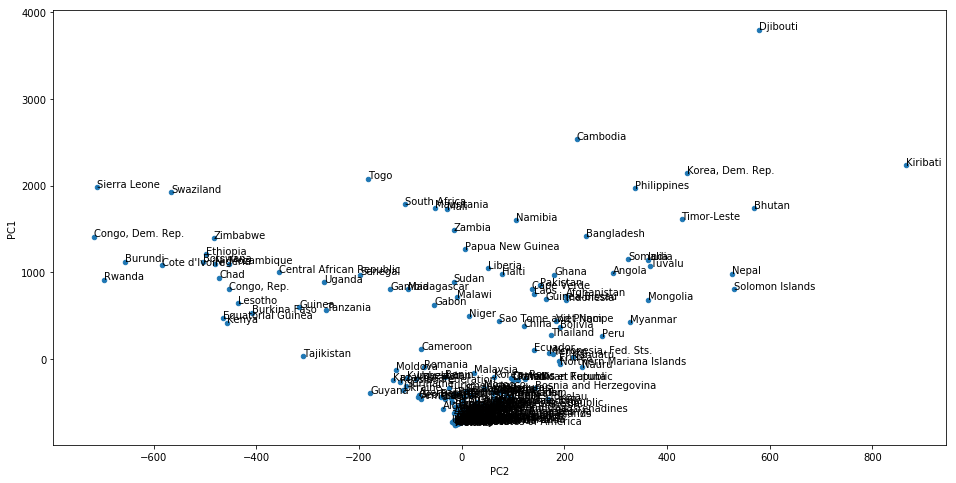

In [51]:
%matplotlib inline
    
ax = df_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(df.index):
    ax.annotate(
        country, 
        (df_2d.iloc[i].PC2, df_2d.iloc[i].PC1)
    )


In [54]:
from sklearn.preprocessing import normalize
    
df_2d['country_mean'] = pd.Series(df.mean(axis=1), index=df_2d.index)
country_mean_max = df_2d['country_mean'].max()
country_mean_min = df_2d['country_mean'].min()
country_mean_scaled = (df_2d.country_mean-country_mean_min) / country_mean_max
df_2d['country_mean_scaled'] = pd.Series(
        country_mean_scaled, 
        index=df_2d.index) 
df_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,732.215864,203.381494,353.333333,0.329731
Albania,-613.296510,4.715978,36.944444,0.032420
Algeria,-569.303713,-36.837051,47.388889,0.042234
American Samoa,-717.082766,5.464696,12.277778,0.009240
Andorra,-661.802241,11.037736,25.277778,0.021457


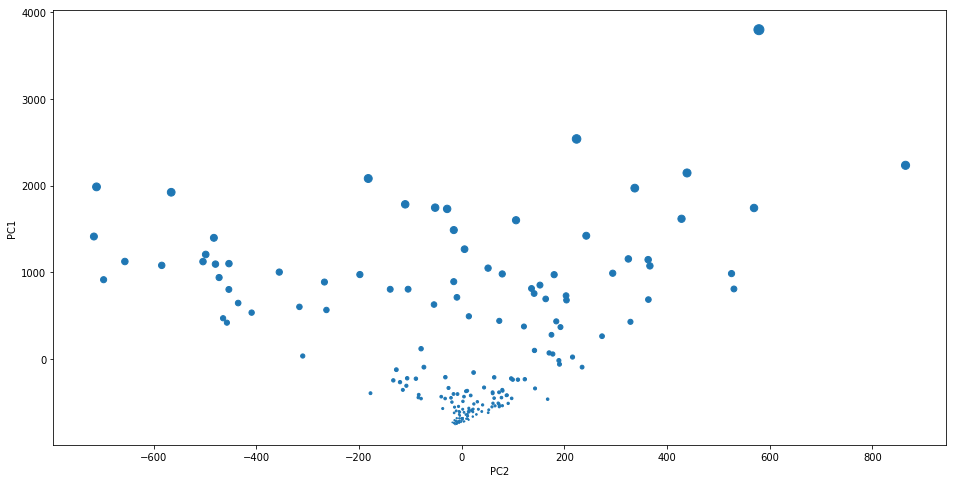

In [55]:
df_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=df_2d['country_mean_scaled']*100, figsize=(16,8))

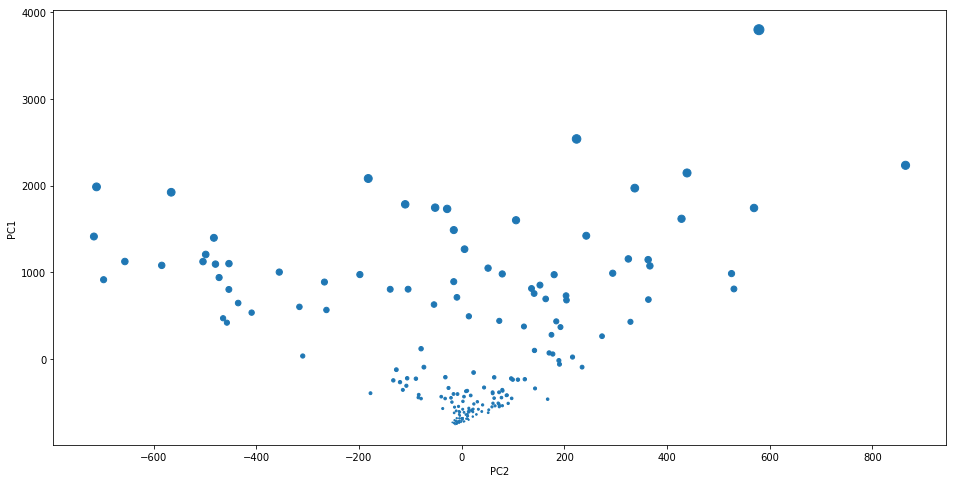

In [56]:
df_2d['country_sum'] = pd.Series(df.sum(axis=1),index=df_2d.index)
country_sum_max = df_2d['country_sum'].max()
country_sum_min = df_2d['country_sum'].min()
country_sum_scaled =(df_2d.country_sum-country_sum_min) / country_sum_max
df_2d['country_sum_scaled'] = pd.Series(country_sum_scaled,index=df_2d.index)
df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=df_2d['country_sum_scaled']*100, 
    figsize=(16,8))

In [57]:
df_2d['country_change'] = pd.Series(df['2007']-df['1990'],index=df_2d.index)
country_change_max = df_2d['country_change'].max()
country_change_min = df_2d['country_change'].min()
country_change_scaled = (df_2d.country_change - country_change_min) / country_change_max
df_2d['country_change_scaled'] = pd.Series(country_change_scaled, index=df_2d.index)
df_2d[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.850840
Albania,-20,1.224790
Algeria,11,1.289916
American Samoa,-37,1.189076
Andorra,-20,1.224790


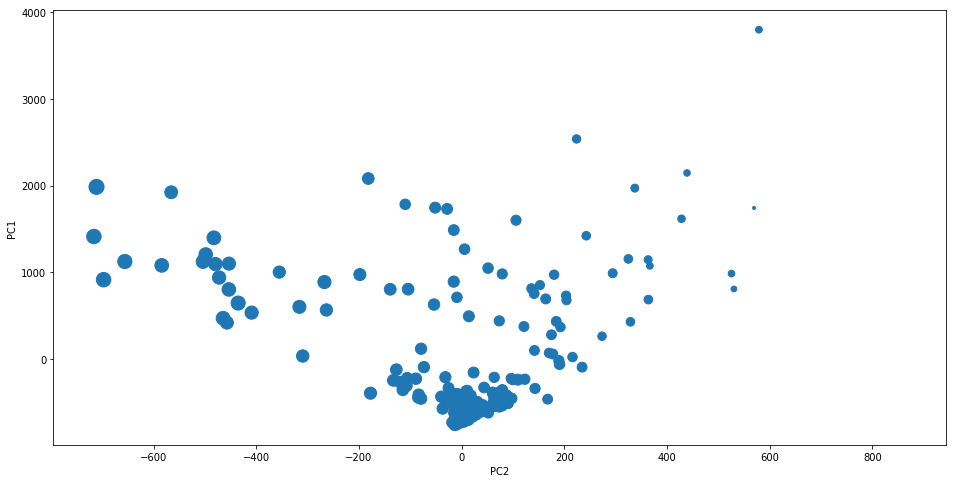

In [58]:
df_2d.plot(
    kind='scatter', 
    x='PC2', y='PC1', 
    s=df_2d['country_change_scaled']*100, 
    figsize=(16,8))

In [87]:
from sklearn.cluster import KMeans
    
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(df)


In [88]:
df_2d['cluster'] = pd.Series(clusters.labels_, index=df_2d.index)

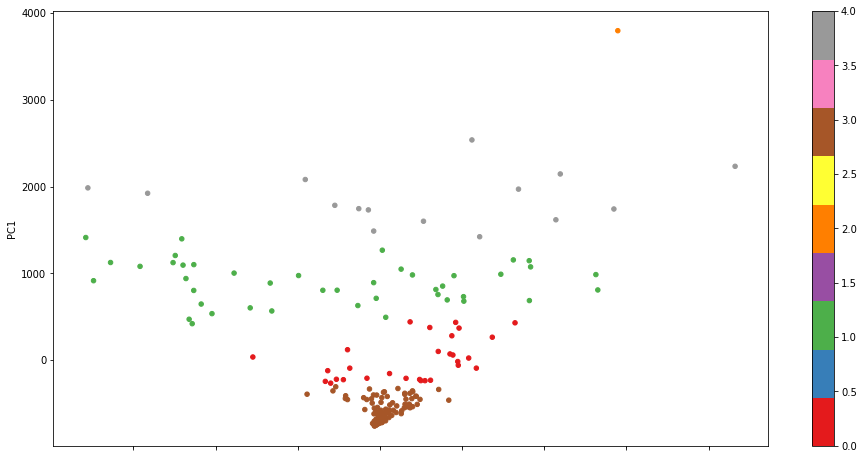

In [89]:
import numpy as np
    
df_2d.plot(
        kind='scatter',
        x='PC2',y='PC1',
        c=df_2d.cluster.astype(np.float), 
        figsize=(16,8),
        colormap = 'Set1')
